In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/epilepsy.data")

In [ ]:
data.head()


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
data.describe()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,193.000000,194.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003468,0.009932,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002765,0.008925,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001880,0.004982,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002700,0.007455,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003960,0.011558,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          193 non-null    float64
 8   Jitter:DDP        194 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

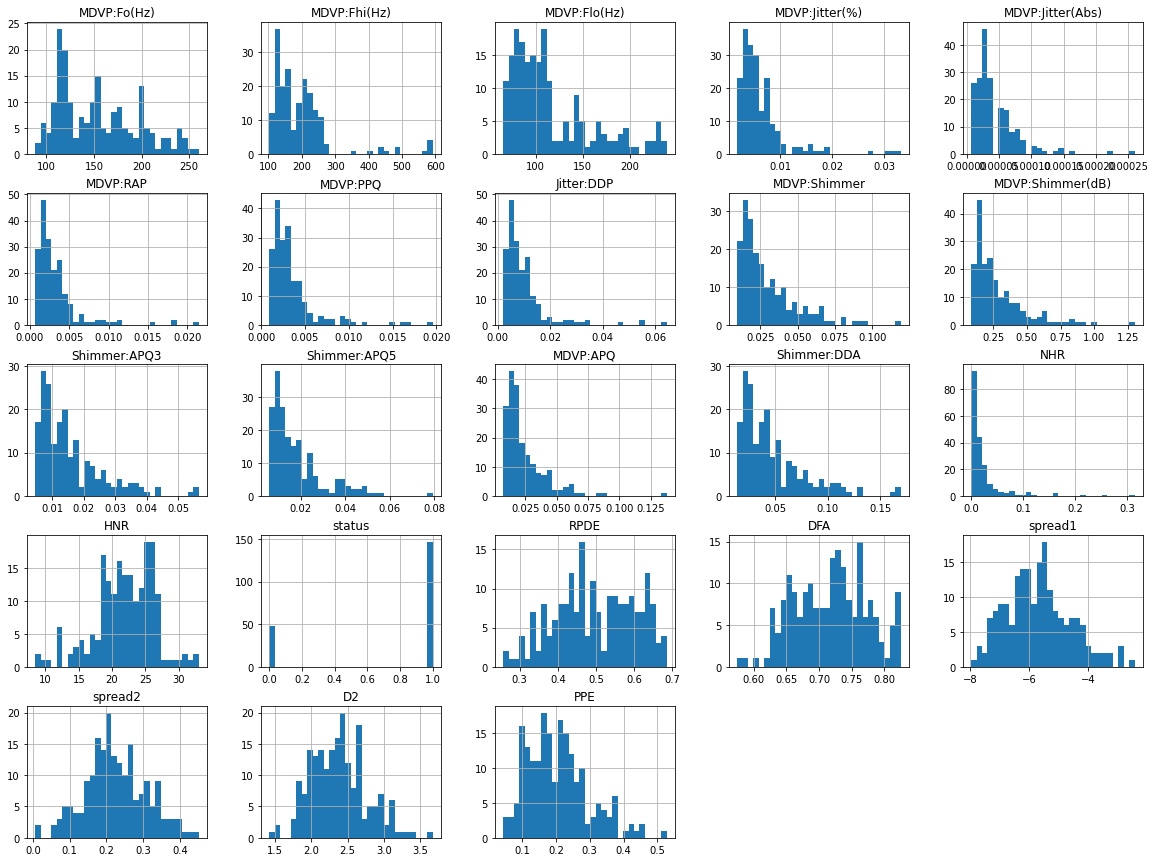

In [ ]:
data.hist(bins=30, figsize=(20,15))
plt.show()

In [ ]:
data["status"].value_counts()

1    147
0     48
Name: status, dtype: int64

In [ ]:
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            2
Jitter:DDP          1
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
data.shape

(195, 24)

In [ ]:
data['MDVP:PPQ'] = data['MDVP:PPQ'].fillna(data['MDVP:PPQ'].median())

In [ ]:
data['Jitter:DDP'] = data['Jitter:DDP'].fillna(data['Jitter:DDP'].median())

In [ ]:
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

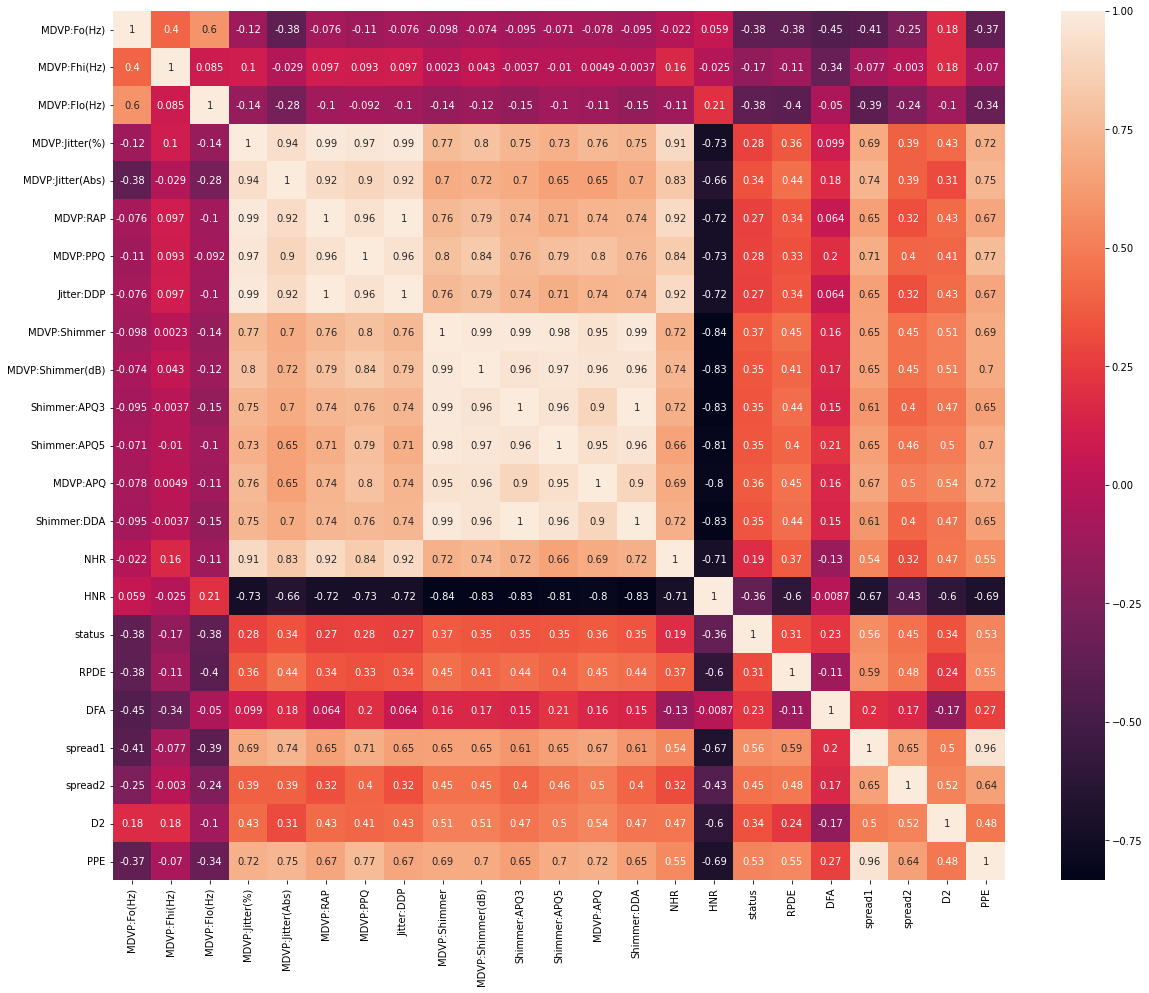

In [ ]:
plt.figure(figsize=(20,16))
sns.heatmap(data.corr(), annot = True)

In [ ]:
#Checking colinearity
#Defining target and features
feat = data.drop(['status','name'], axis=1)

In [ ]:
target = data['status']

In [ ]:
# Create a correlation matrix
corr_matrix = feat.corr()

In [ ]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

<ipython-input-17-92e4951f08d8>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [ ]:
# Find index of feature columns with correlation greater than a threshold (e.g. 0.8)
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

In [ ]:
# Drop the features
new_feat = feat.drop(data[to_drop], axis = 1)

In [ ]:
# Scaling features using standard scaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
sns.histplot(X)

NameError: ignored

In [ ]:
# defining train test split
X = new_feat
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Defining models 
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}


In [ ]:
# Use grid search to find the best parameters for each model
parameters = {"C": [0.1, 1, 10], "penalty": ["l1", "l2"]}
grid_clf = GridSearchCV(LogisticRegression(), parameters, cv=5, scoring='f1_macro')
grid_clf.fit(X_train, y_train)
models["Logistic Regression"] = grid_clf.best_estimator_

parameters = {"max_depth": [5, 10, 15, 20], "min_samples_split": [2, 5, 10]}
grid_clf = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, scoring='f1_macro')
grid_clf.fit(X_train, y_train)
models["Decision Tree"] = grid_clf.best_estimator_

parameters = {"max_depth": [5, 10, 15, 20], "min_samples_split": [2, 5, 10], "n_estimators": [10, 50, 100]}
grid_clf = GridSearchCV(RandomForestClassifier(), parameters, cv=5, scoring='f1_macro')
grid_clf.fit(X_train, y_train)
models["Random Forest"] = grid_clf.best_estimator_

parameters = {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}
grid_clf = GridSearchCV(SVC(), parameters, cv=5, scoring='f1_macro')
grid_clf.fit(X_train, y_train)
models["SVM"] = grid_clf.best_estimator_

In [ ]:
# Training model on training data and evaluating performance on testing data
for model_name in models:
    clf = models[model_name]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"{model_name} Evaluation:")
    print(classification_report(y_test, y_pred))
    print("\n")

In [ ]:
# Selecting the model with the best performance
best_model = max(models, key=lambda x: models[x].score(X_test, y_test))
print(f"Best Model is {best_model}")

In [ ]:
#Finalising model
best_clf = models[best_model]
y_pred = best_clf.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
plt.imshow(confusion_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title(best_model)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()